In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split

In [7]:
df_ci=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df_ci

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df_ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df_ci.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


As we can observe that Income is dependent variable and other columns are independent varible and our target varible is Income

Exploratory Data Analysis(EDA)

In [5]:
df_ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df_ci.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see that there is no null values in the dataset

In [7]:
df_ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


here we can observe that there are object datatype and interger datatype

In [8]:
df_ci.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
#checking the uniqus values in the columns
for i in df_ci.columns:
    print(df_ci[i].value_counts())
    print("\n")
    

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64


Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64


Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool       

from this info we find that its the binary classification problem and found in some columns like workclass,occupation and Native_country we found some rows with the symbol of the question mark(?) and they seems to be white spaces and to be replaced with Nan values

In [24]:
columns_to_replace = ['Workclass', 'Occupation', 'Native_country']
# Removing leading and trailing spaces before replacing '?' with NaN
df_ci[columns_to_replace]= df_ci[columns_to_replace].apply(lambda x: x.str.strip() if x.dtype == "O" else x)
df_ci[columns_to_replace]= df_ci[columns_to_replace].replace('?', np.nan)

In [25]:
for col in columns_to_replace:
    mode_value = df_ci[col].mode()[0]
    print(f"Mode for {col}: {mode_value}")
    df_ci[col].fillna(mode_value, inplace=True)


Mode for Workclass: Private
Mode for Occupation: Prof-specialty
Mode for Native_country: United-States


In [26]:
df_ci['Workclass'].value_counts()

Workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [27]:
df_ci.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


by observing datasets seems imbalanced and we must balance the data before modelling and in columns like education_num mean is equal to median 

# Visualiztion of the dataset

Income
 <=50K    24719
 >50K      7841
Name: count, dtype: int64


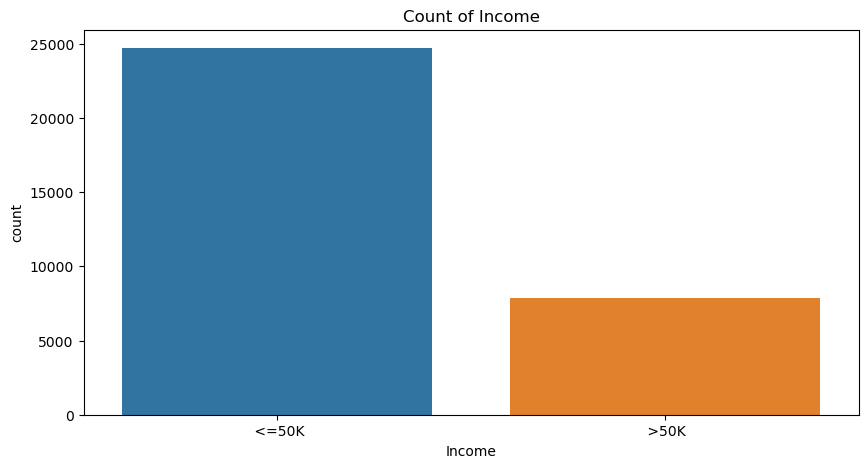

In [28]:
#lets see the count number of unique values in the target varaible
print(df_ci['Income'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot(x='Income',data=df_ci)
plt.title('Count of Income')
plt.show()

data seems to be imbalanced in the target varible

In [29]:
#countplots for the categorical data

cat_col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country']
cat_col

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

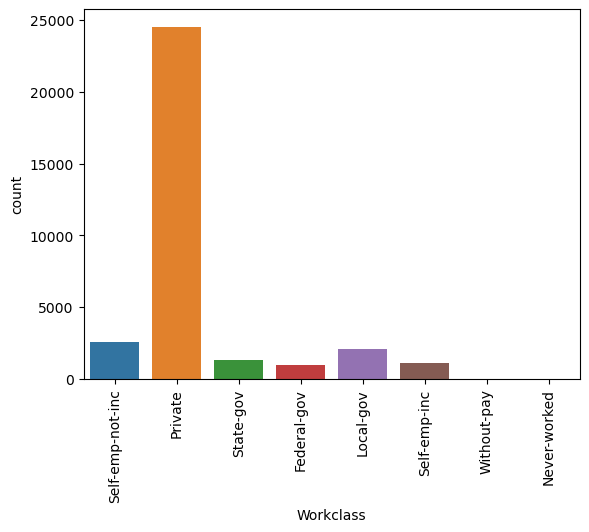

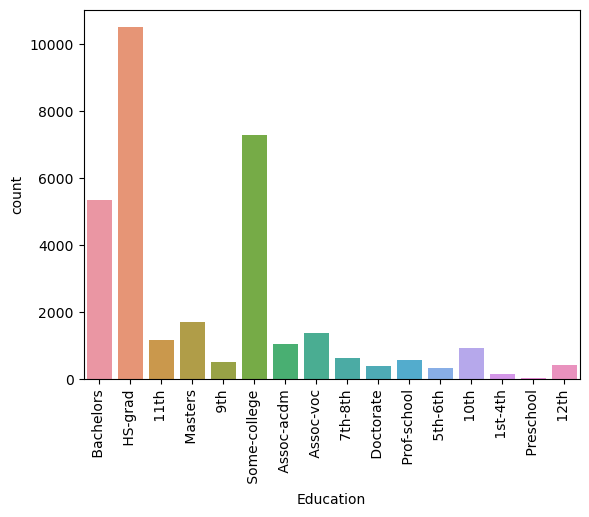

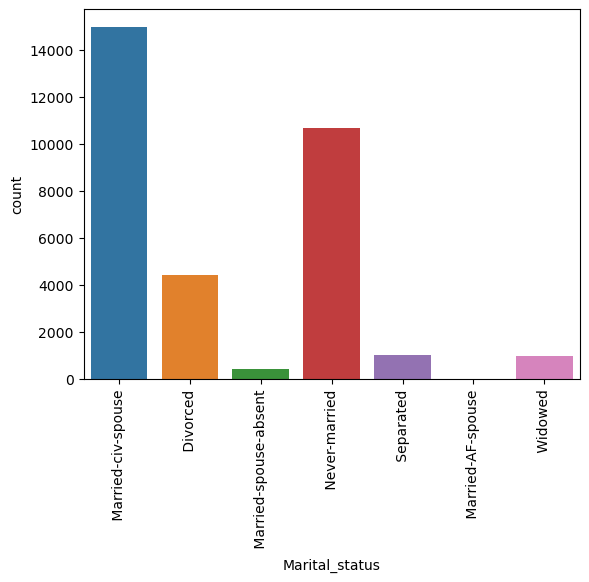

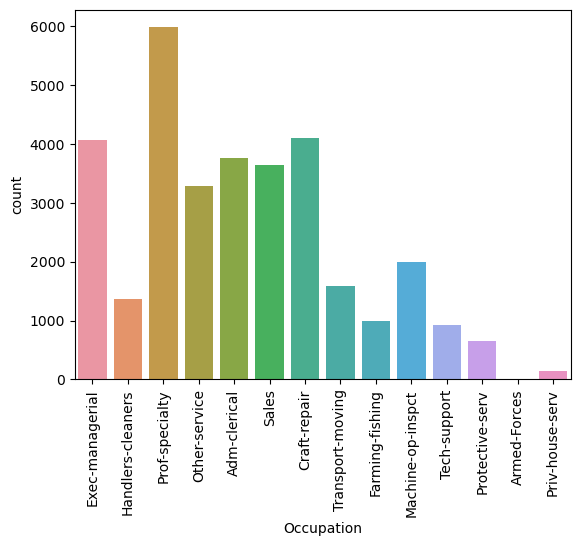

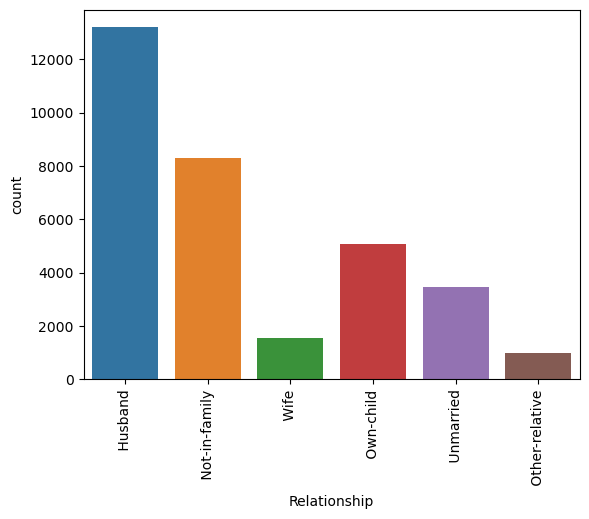

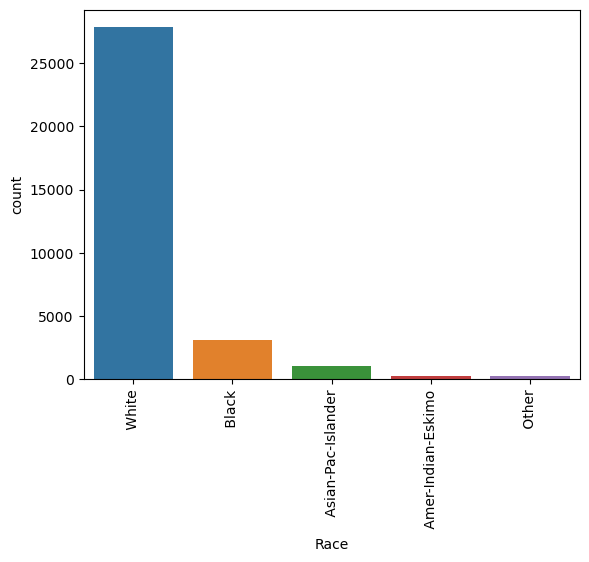

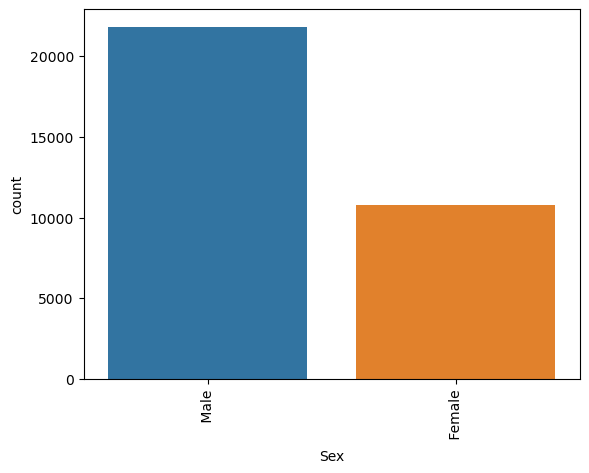

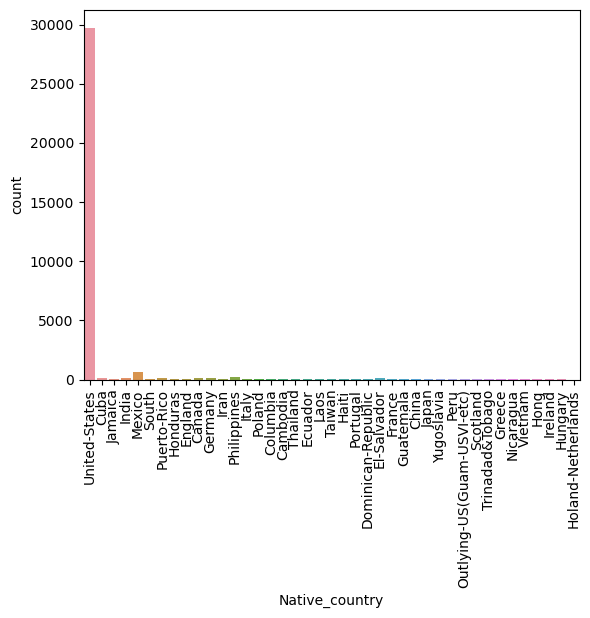

In [30]:
#visualization of the categorical columns

for i in cat_col:
    sns.countplot(x=i,data=df_ci)
    plt.xticks(rotation=90)
    plt.show()

1.Here we can observe that private sector is more as compared  to other sectors in workclass
2.In education we can observe that HS-grad is more and followed by Some-college
3.In Marital Status we found that Married -civ-spouse is maximum
4.In occupation the persons working in Handlers have less people and in service of army and servants
5 In relationship we can observe that husband is highest earner
6.In Race we can observe that white people are higest in count
7.IN gender we can observe that male are more in count
8.In Native country US citizens are highest

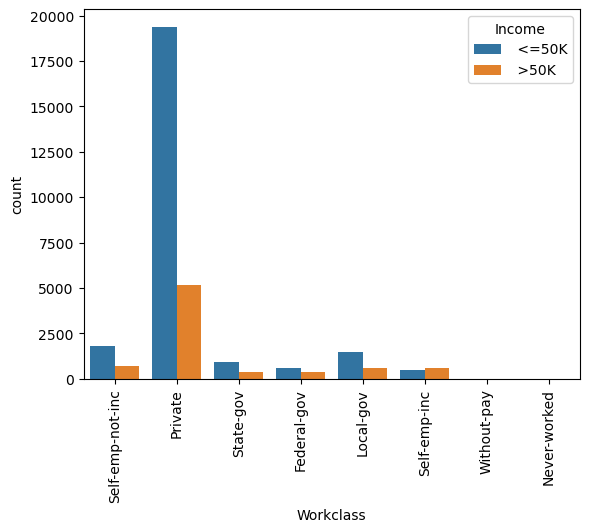

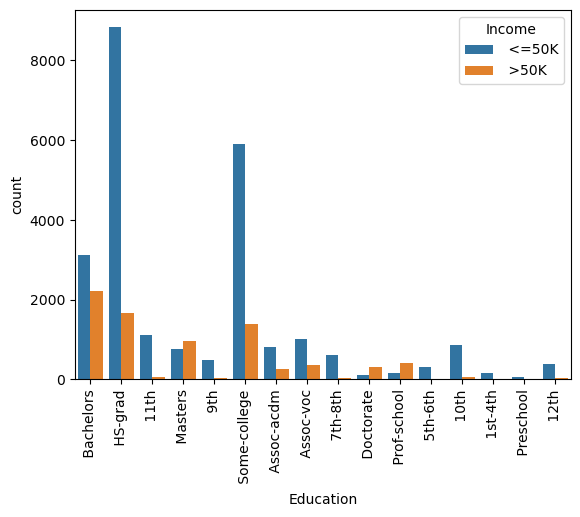

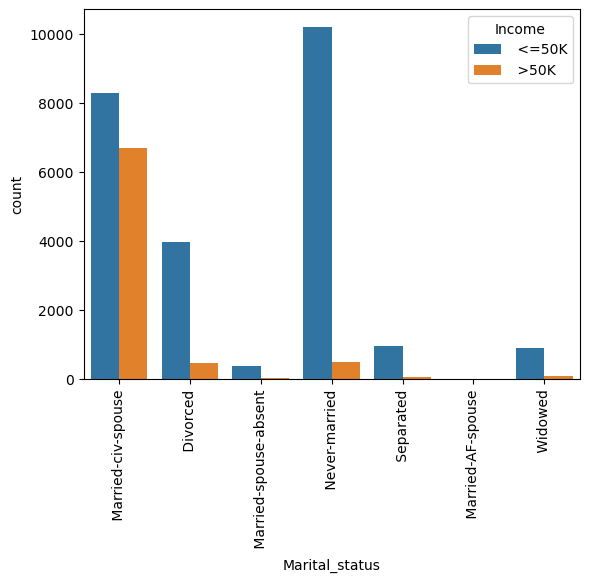

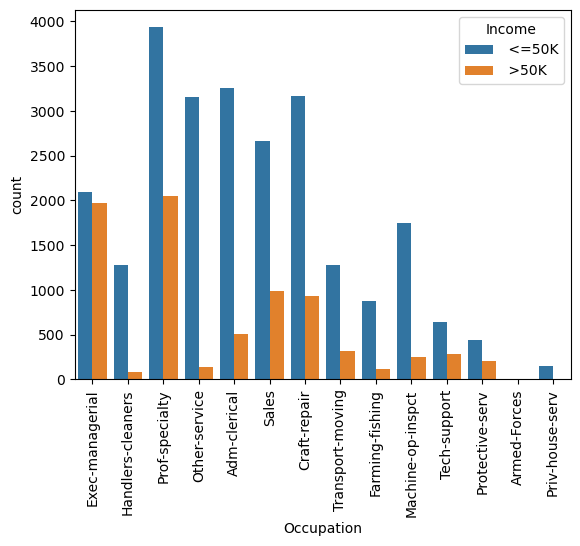

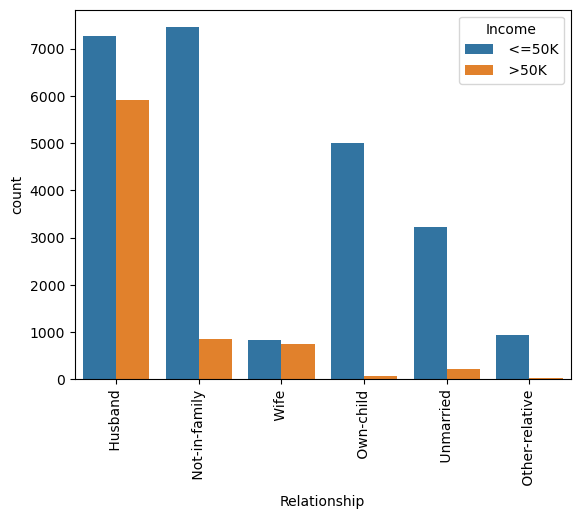

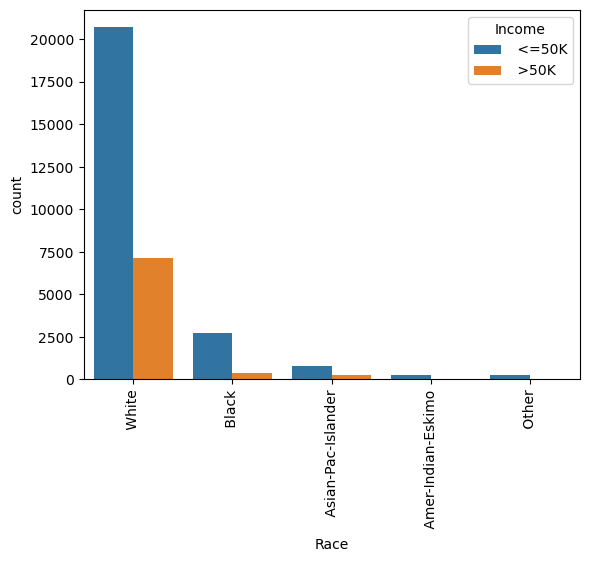

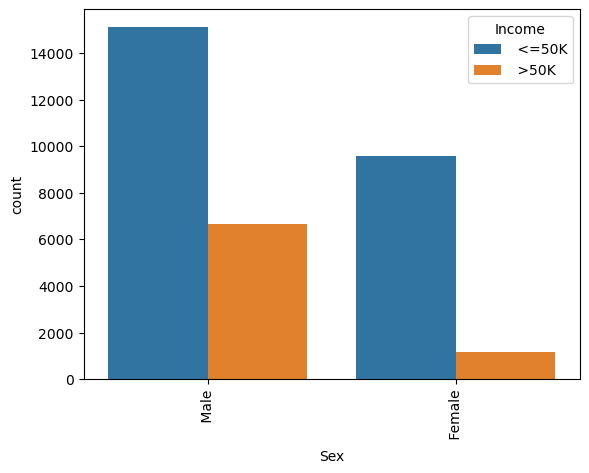

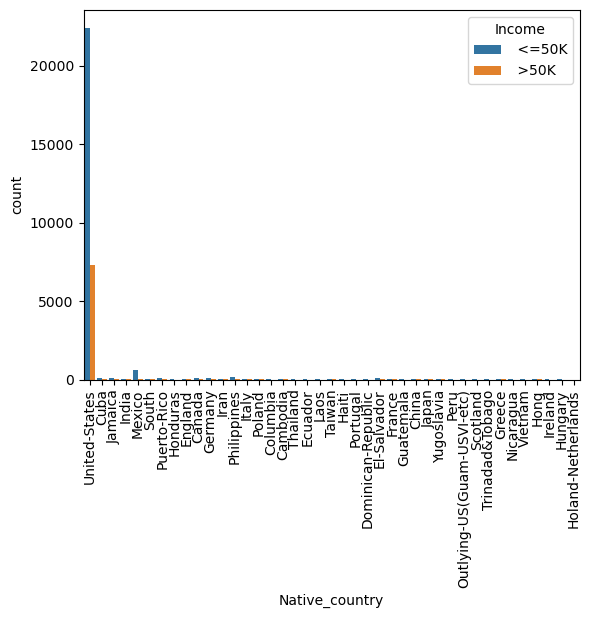

In [31]:
for i in cat_col:
    sns.countplot(x=i,hue='Income',data=df_ci)
    plt.xticks(rotation=90)
    plt.show()

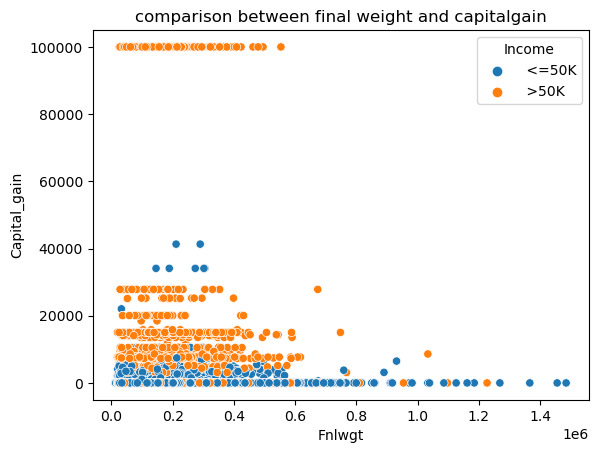

In [10]:
#comparing the final weight and capitalgain
plt.title("comparison between final weight and capitalgain")
sns.scatterplot(x="Fnlwgt",y="Capital_gain",data=df_ci,hue="Income")
plt.show()

In this plot we can observe that capital gain high when final weight is low

here we can observe that capital gain is not proportional to Age

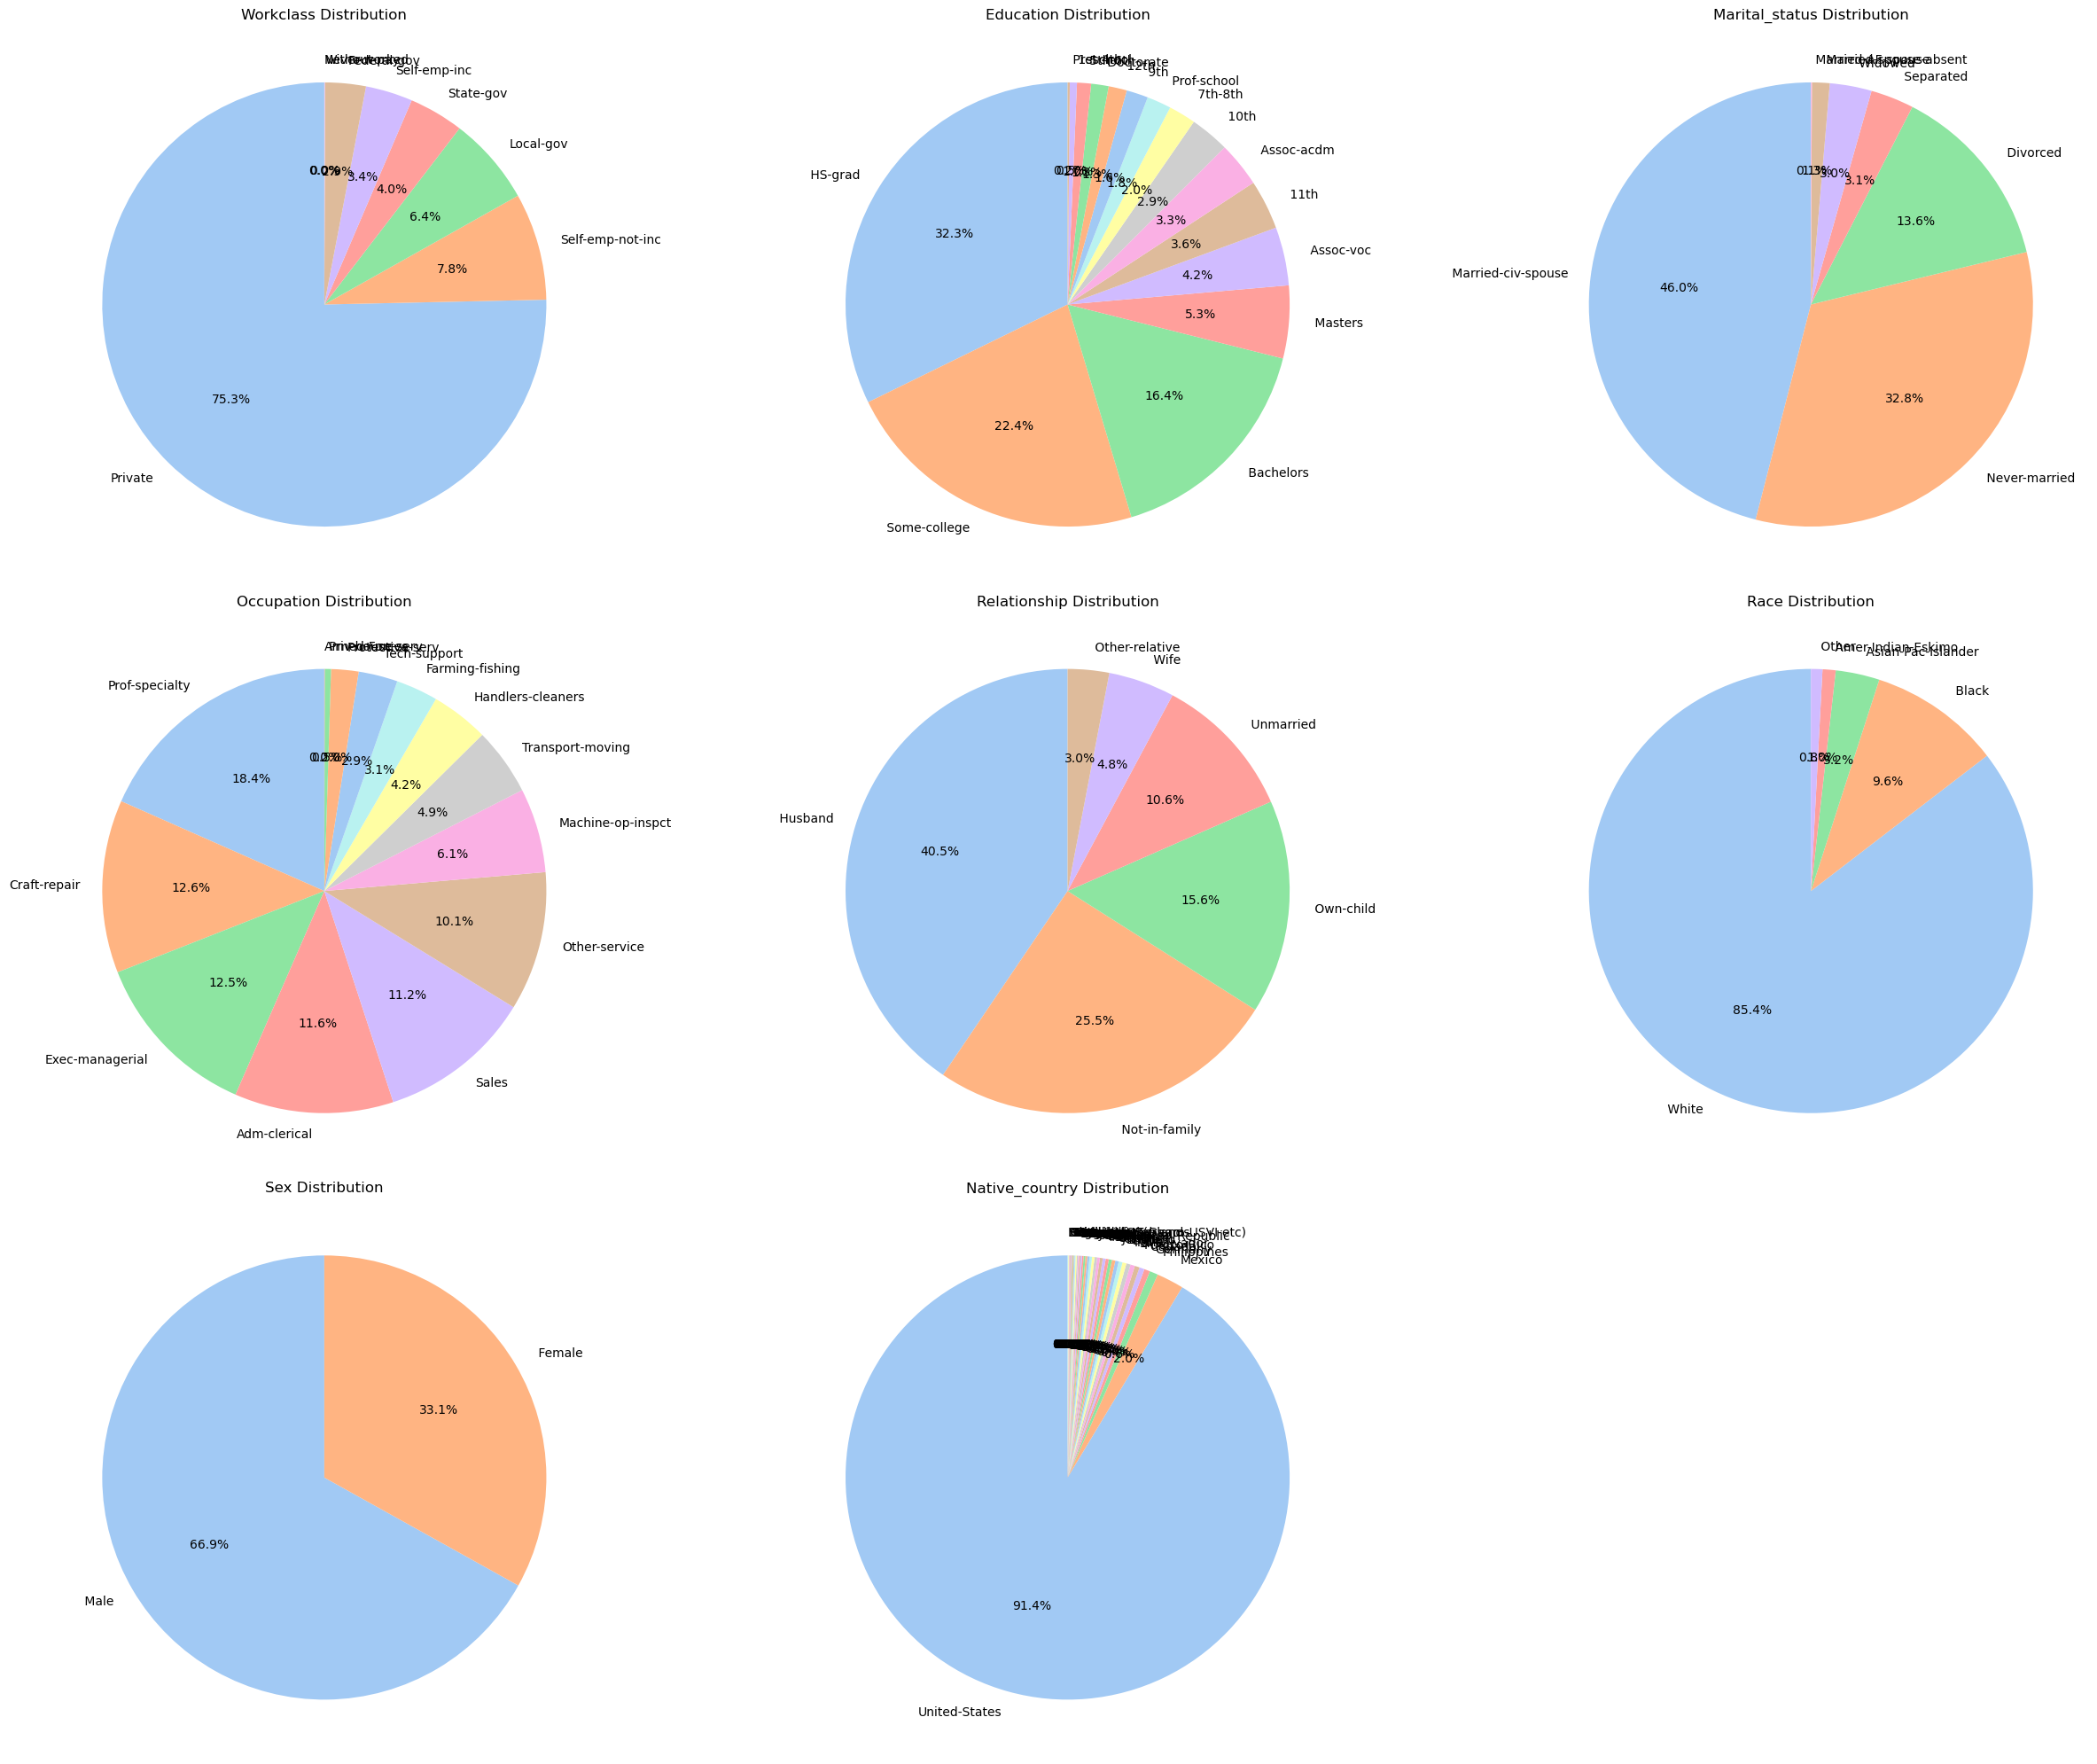

In [41]:
plt.figure(figsize=(25, 20))

for i, col in enumerate(cat_col, start=1):
    plt.subplot(3, 3, i)
    counts = df_ci[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()

here we can observe the distribution of categorical columns in piechart with values distributed

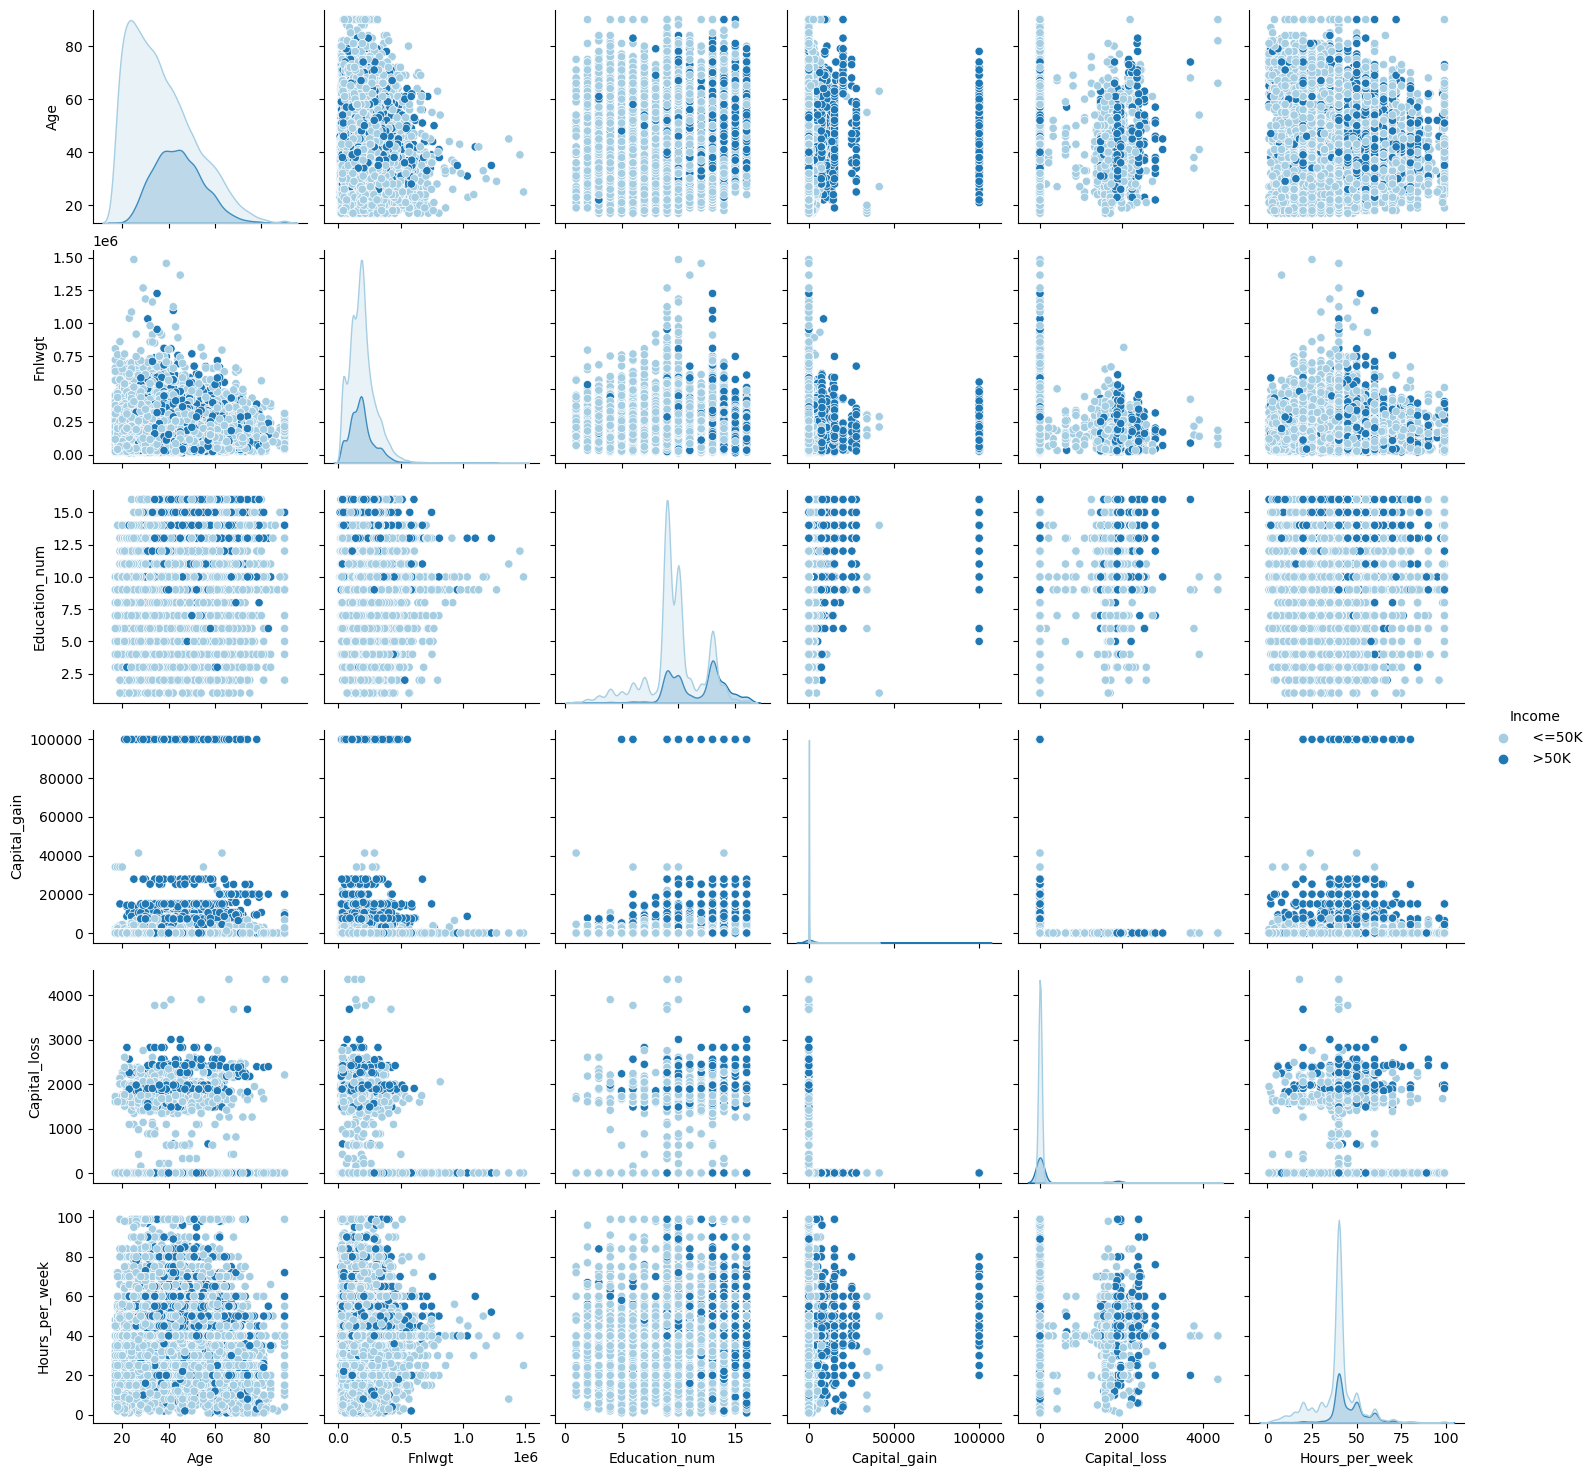

In [42]:
#Multivariate Analysis

sns.pairplot(df_ci ,hue="Income",palette="Paired")
plt.show()

Here we can observe that pairplot income with different numerical columns

here we can observe in the columns as Education num and education is same so we can drop the education num

In [44]:
df_c=df_ci.drop(['Education_num'],axis=1)
df_c.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
num_col=['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

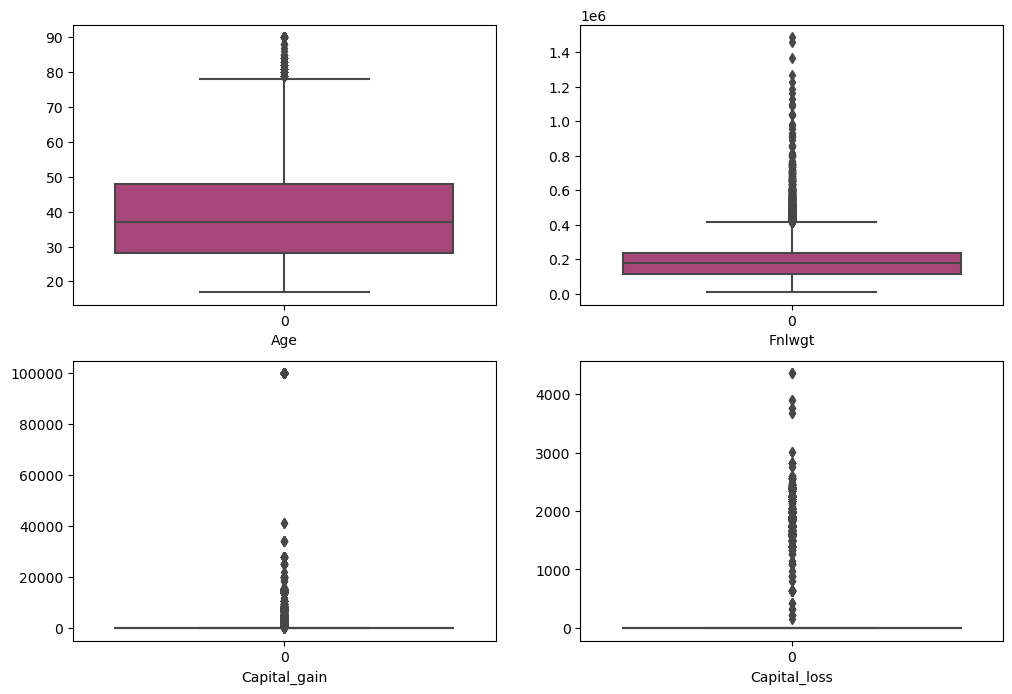

In [46]:
#checking for the outliers:-
#lets check the outliers by plotting the boxplot

plt.figure(figsize=(12,8))
plotnumber=1
for col in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df_c[col],palette="magma")
        plt.xlabel(col)
        plt.yticks
        plotnumber+=1

hee we can observe outliers in all Age ,fnlwgt ,capital_gain and capital loss and we need to remove the outliers

In [47]:
from scipy import stats
# Calculate the Z-Scores for each numerical attribute
num= df_c.drop('Income', axis=1).select_dtypes(include=['number']).columns
z_scores=np.abs(stats.zscore(df_c[num]))

# Set a threshold for considering data points as outliers 
threshold=3

# Identify outliers using the threshold
outliers=(z_scores > threshold).any(axis=1)

# Filter the dataset to remove rows with outliers
df_c2=df_c[~outliers]
df_c2

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
#shape of new and old dataframe
print('old Dataframa--',df_c.shape[0])
print('New DataFrame--',df_c2.shape[0])

old Dataframa-- 32560
New DataFrame-- 30028


In [49]:
print(((df_c.shape[0]-df_c2.shape[0])/df_c.shape[0])*100)

7.776412776412776


Data loss percentage is less than 10% we can got with it

In [50]:
#Encoding categorical columns using ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_c2.columns:
    if df_c2[i].dtypes=='object':
        df_c2[i]=OE.fit_transform(df_c2[i].values.reshape(-1,1))
df_c2                               
           

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,2.0,3.0,0.0,4.0,1.0,0,0,13,37.0,0.0
1,38,3.0,215646,11.0,0.0,5.0,1.0,4.0,1.0,0,0,40,37.0,0.0
2,53,3.0,234721,1.0,2.0,5.0,0.0,2.0,1.0,0,0,40,37.0,0.0
3,28,3.0,338409,9.0,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,2.0,3.0,5.0,4.0,0.0,0,0,40,37.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,2.0,12.0,5.0,4.0,0.0,0,0,38,37.0,0.0
32556,40,3.0,154374,11.0,2.0,6.0,0.0,4.0,1.0,0,0,40,37.0,1.0
32557,58,3.0,151910,11.0,6.0,0.0,4.0,4.0,0.0,0,0,40,37.0,0.0
32558,22,3.0,201490,11.0,4.0,0.0,3.0,4.0,1.0,0,0,20,37.0,0.0


In [51]:
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30028 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             30028 non-null  int64  
 1   Workclass       30028 non-null  float64
 2   Fnlwgt          30028 non-null  int64  
 3   Education       30028 non-null  float64
 4   Marital_status  30028 non-null  float64
 5   Occupation      30028 non-null  float64
 6   Relationship    30028 non-null  float64
 7   Race            30028 non-null  float64
 8   Sex             30028 non-null  float64
 9   Capital_gain    30028 non-null  int64  
 10  Capital_loss    30028 non-null  int64  
 11  Hours_per_week  30028 non-null  int64  
 12  Native_country  30028 non-null  float64
 13  Income          30028 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.4 MB


In [52]:
#checking the correlation betweeen features and the target
cor=df_c2.corr()
cor

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.032774,-0.074157,-0.012307,-0.284030,-0.001509,-0.266150,0.025182,0.086214,0.129832,0.020606,0.089518,-0.003275,0.236579
Workclass,0.032774,1.000000,-0.023257,0.003333,-0.016317,0.008136,-0.057682,0.045505,0.068906,0.012199,-0.010120,0.027318,-0.000828,-0.006898
Fnlwgt,-0.074157,-0.023257,1.000000,-0.025251,0.029403,-0.002667,0.006756,-0.008919,0.030261,-0.002893,0.002461,-0.014476,-0.066400,-0.010668
Education,-0.012307,0.003333,-0.025251,1.000000,-0.035853,-0.042006,-0.009153,0.015971,-0.030643,0.027278,-0.000645,0.056424,0.080295,0.074714
Marital_status,-0.284030,-0.016317,0.029403,-0.035853,1.000000,0.035310,0.185443,-0.066351,-0.124501,-0.068461,-0.013838,-0.195567,-0.019743,-0.194637
Occupation,-0.001509,0.008136,-0.002667,-0.042006,0.035310,1.000000,-0.036300,-0.003374,0.048755,0.009392,-0.001851,-0.023266,-0.000991,0.030271
Relationship,-0.266150,-0.057682,0.006756,-0.009153,0.185443,-0.036300,1.000000,-0.116493,-0.576820,-0.089911,0.028781,-0.256778,-0.010104,-0.244848
Race,0.025182,0.045505,-0.008919,0.015971,-0.066351,-0.003374,-0.116493,1.000000,0.090040,0.023614,0.001361,0.045703,0.115604,0.071960
Sex,0.086214,0.068906,0.030261,-0.030643,-0.124501,0.048755,-0.576820,0.090040,1.000000,0.070402,-0.026295,0.234314,0.001858,0.208901
Capital_gain,0.129832,0.012199,-0.002893,0.027278,-0.068461,0.009392,-0.089911,0.023614,0.070402,1.000000,-0.008986,0.097301,0.010888,0.342805


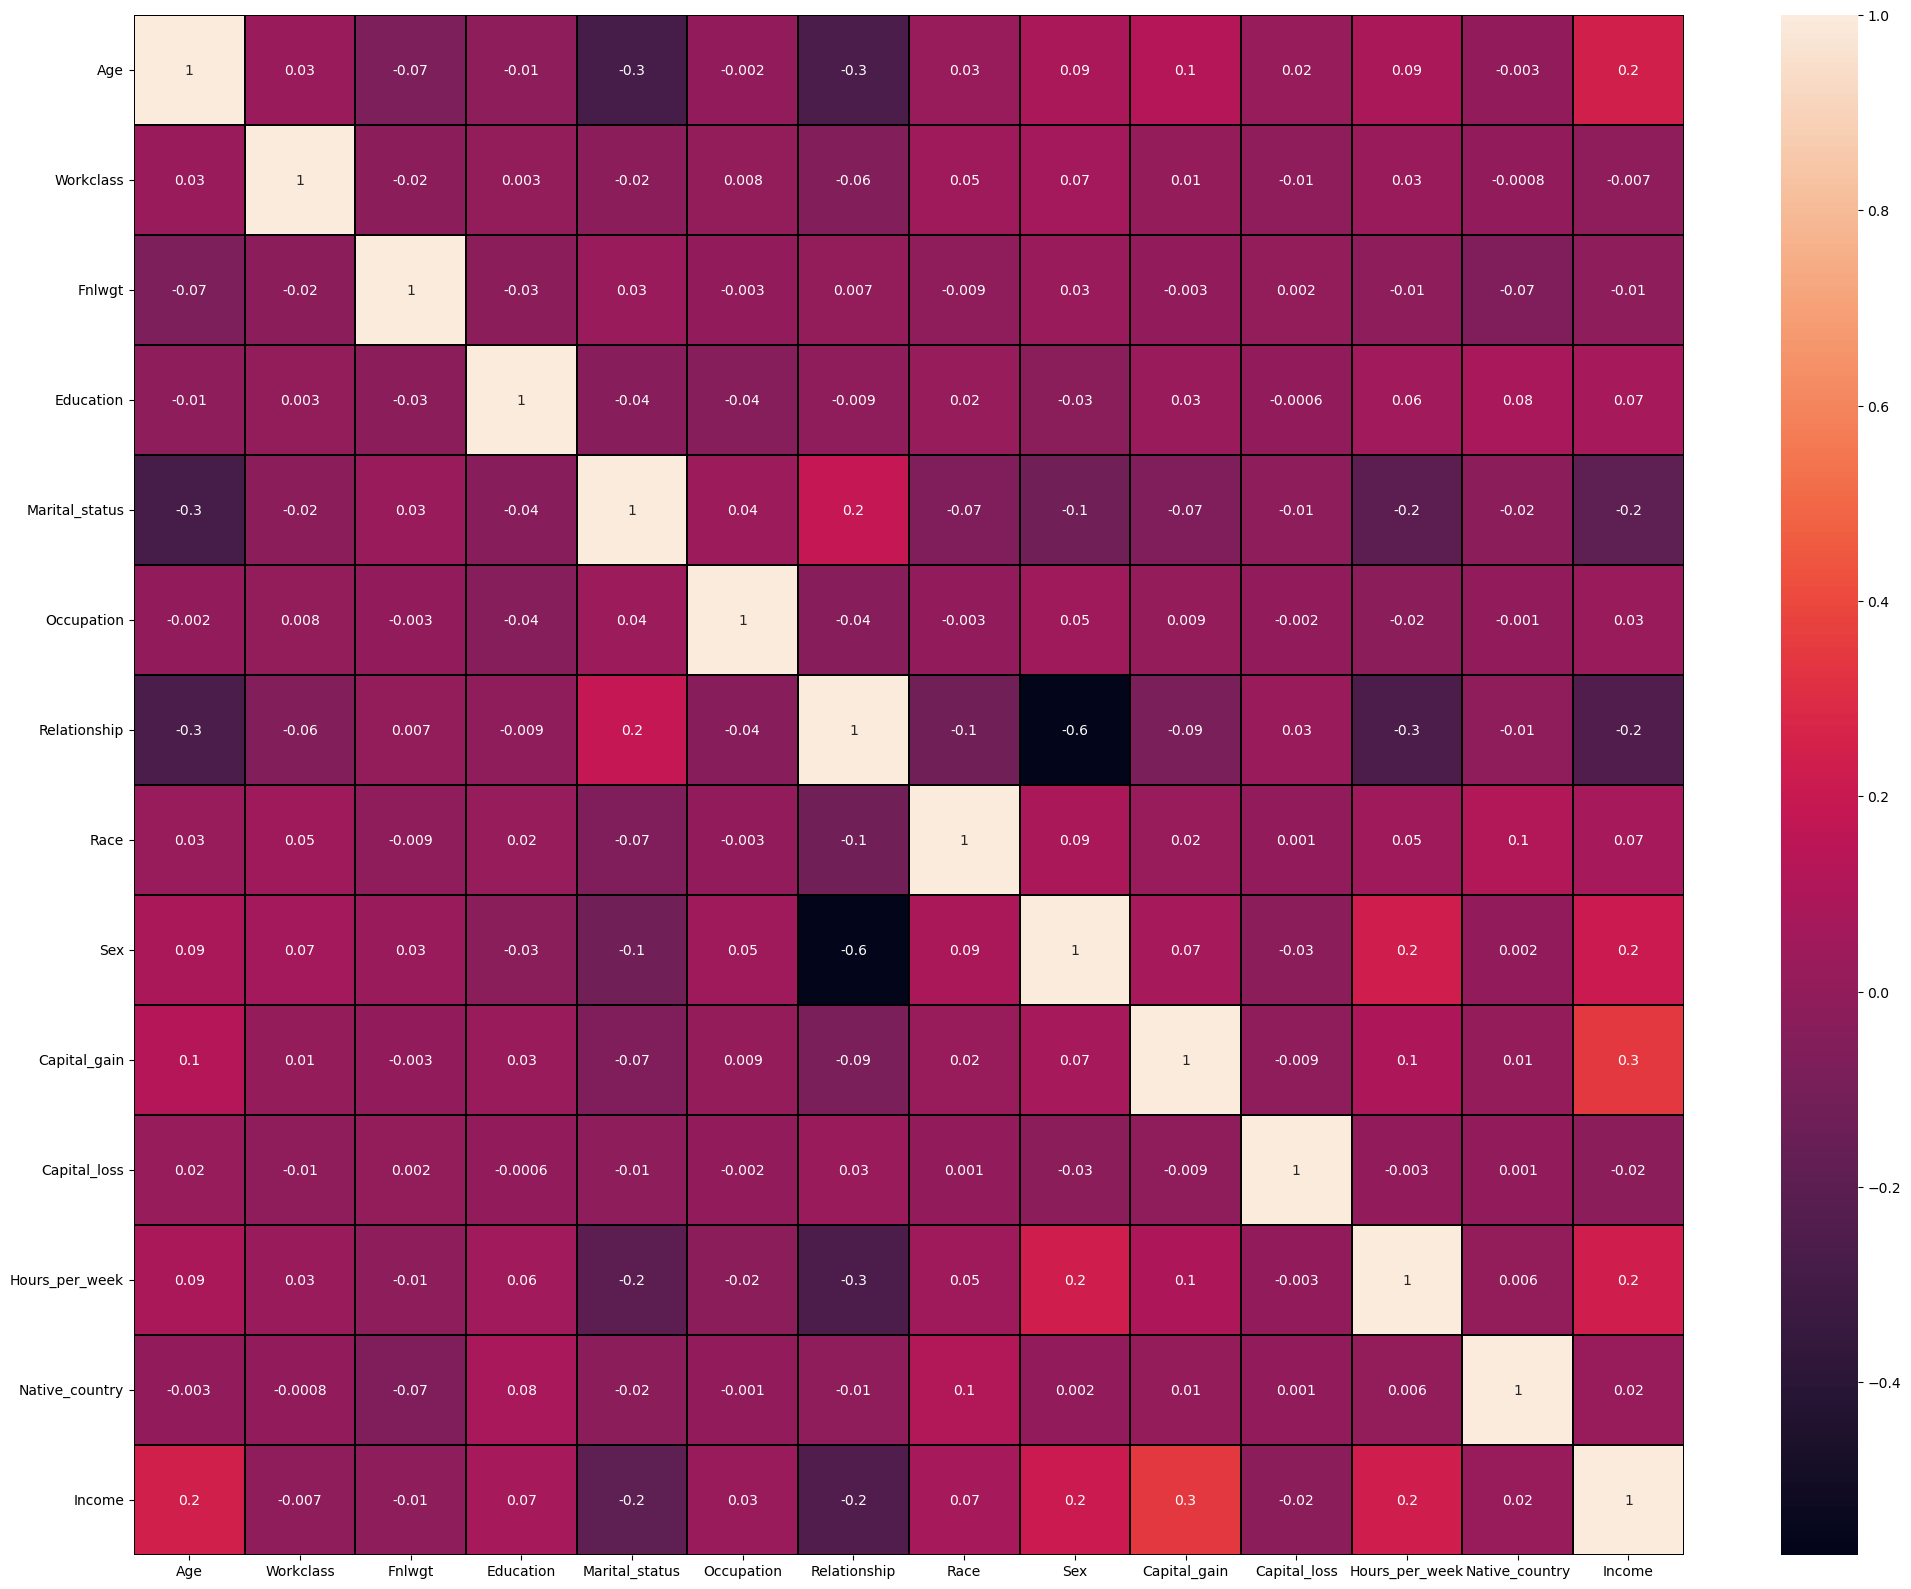

In [53]:
#visualizing the correlation matrix by plotting  heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df_c2.corr(),linewidth=0.1,fmt=".1g",linecolor="black",annot=True)
plt.yticks(rotation=0)
plt.show()

In the hearmap we did not find any correlation between the columns as we observed that is less correlated to each other 

In [54]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Capital_gain      0.342805
Age               0.236579
Hours_per_week    0.230519
Sex               0.208901
Education         0.074714
Race              0.071960
Occupation        0.030271
Native_country    0.021941
Workclass        -0.006898
Fnlwgt           -0.010668
Capital_loss     -0.016458
Marital_status   -0.194637
Relationship     -0.244848
Name: Income, dtype: float64

maximum correlated values are Capital_gain and followed by age

Feature scaling using Standard Scalariztian 

In [55]:
#separating features and label
x=df_c2.drop("Income",axis=1)
y=df_c2["Income"]

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.883097,1.737284,-1.079206,-0.329704,-0.412219,-0.781979,-0.918763,0.394659,0.715637,-0.243867,-0.036848,-2.411906,0.264312
1,-0.013956,-0.078078,0.318698,0.183720,-1.732903,-0.279340,-0.297202,0.394659,0.715637,-0.243867,-0.036848,0.010616,0.264312
2,1.107361,-0.078078,0.520194,-2.383401,-0.412219,-0.279340,-0.918763,-1.953203,0.715637,-0.243867,-0.036848,0.010616,0.264312
3,-0.761501,-0.078078,1.615490,-0.329704,-0.412219,0.725937,2.189042,-1.953203,-1.397357,-0.243867,-0.036848,0.010616,-5.301908
4,-0.088711,-0.078078,1.046895,0.440432,-0.412219,-0.781979,2.189042,0.394659,-1.397357,-0.243867,-0.036848,0.010616,0.264312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,-0.836255,-0.078078,0.758726,-0.843129,-0.412219,1.479895,2.189042,0.394659,-1.397357,-0.243867,-0.036848,-0.168830,0.264312
30024,0.135553,-0.078078,-0.328541,0.183720,-0.412219,-0.028021,-0.918763,0.394659,0.715637,-0.243867,-0.036848,0.010616,0.264312
30025,1.481133,-0.078078,-0.354569,0.183720,2.229149,-1.535937,1.567481,0.394659,-1.397357,-0.243867,-0.036848,0.010616,0.264312
30026,-1.210027,-0.078078,0.169163,0.183720,0.908465,-1.535937,0.945920,0.394659,0.715637,-0.243867,-0.036848,-1.783845,0.264312


In [57]:
#checking variance Infltation Factor[VIF]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,Vif values,Features
0,1.177717,Age
1,1.007966,Workclass
2,1.012829,Fnlwgt
3,1.016171,Education
4,1.137111,Marital_status
5,1.007047,Occupation
6,1.661065,Relationship
7,1.032177,Race
8,1.543342,Sex
9,1.028296,Capital_gain


all the columns are collinear to each other 

Oversampling as there is huge gap and class is imbalance

In [61]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [62]:
y.value_counts()

Income
0.0    23369
1.0     6659
Name: count, dtype: int64

In [63]:
y1.value_counts()

Income
0.0    23369
1.0    23369
Name: count, dtype: int64

The minor class is duplicated and the class is balanced now

Modelling

In [64]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [65]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [66]:
# Initialize and train a Decision Tree model
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Initialize and train a Random Forest model
rm= RandomForestClassifier()
rm.fit(X_train, y_train)

# Initialize the linear Regressionmoder
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

# Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1) 
svm_model.fit(X_train, y_train)
y_pred= svm_model.predict(X_test)

# AdaBoost classifier using Decision Trees as base estimators
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred= adaboost_model.predict(X_test)

# Evaluate the Decision Tree model
y_pred= dt.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test,y_pred)
decision_tree_report = classification_report(y_test, y_pred)

# Evaluate the Random Forest model
y_pred= rm.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_report = classification_report(y_test, y_pred)

#Evalueate the linear Regresson model
y_pred= dt.predict(X_test)
Linear_Regression_accuracy = accuracy_score(y_test,y_pred)
Linear_Regression_report = classification_report(y_test, y_pred)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test,y_pred)
svm_classification_report = classification_report(y_test,y_pred)

# Evaluate AdaBoost
adaboost_accuracy = accuracy_score(y_test,y_pred)
adaboost_classification_report = classification_report(y_test,y_pred)

print("\nDecision Tree Model:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_report)

print("\nRandom Forest Model:")
print(f"Accuracy: {random_forest_accuracy:.2f}")
print("Classification Report:\n", random_forest_report)

print("\nLineat Regression Model:")
print(f"Accuracy: {decision_tree_accuracy:.2f}")
print("Classification Report:\n", decision_tree_report)

print("SVM Results:")
print(f"Accuracy: {svm_accuracy:.2f}")
print("Classification Report:\n", svm_classification_report)

print("\nAdaBoost Results:")
print(f"Accuracy: {adaboost_accuracy:.2f}")
print("Classification Report:\n", adaboost_classification_report)


Decision Tree Model:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4748
         1.0       0.85      0.87      0.86      4600

    accuracy                           0.86      9348
   macro avg       0.86      0.86      0.86      9348
weighted avg       0.86      0.86      0.86      9348


Random Forest Model:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      4748
         1.0       0.89      0.91      0.90      4600

    accuracy                           0.90      9348
   macro avg       0.90      0.90      0.90      9348
weighted avg       0.90      0.90      0.90      9348


Lineat Regression Model:
Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4748
         1.0       0.85      0.87      0.86      4

the accuracy of 90% is higher for random forest classifier 

We can also do the hyperparameter tuning by grid search method

In [67]:
from sklearn.model_selection import GridSearchCV

# Creating the parameter grid
param_grid = {'n_estimators': [50, 100, 150],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}

# Creating the Random Forest Classifier
rm= RandomForestClassifier()

# Create Grid Search
grid_search = GridSearchCV(estimator=rm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model for predictions
best_rm = grid_search.best_estimator_
y_pred = best_rm.predict(X_test)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


Prediction of the values

In [68]:
#  X_train having the data of the triaining dataset 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Using the trained model to make predictions on the test dataset
y_test_pred = model.predict(X_test)

# Now, y_pred contains the predicted values for the test dataset

In [69]:
y_test_pred

array([1., 0., 0., ..., 1., 0., 0.])

In [70]:
p=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=y_test_pred
df['Original']=p
df

,Predicted,Original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9343,0.0,0.0
9344,1.0,1.0
9345,1.0,1.0
9346,0.0,0.0
